In [ ]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
filename = '/content/Zoo.csv'
names = ['animal name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type' ]
df = read_csv(filename, names=names)
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
1,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
2,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
98,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
99,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
100,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
df.shape

(102, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  102 non-null    object
 1   hair         102 non-null    object
 2   feathers     102 non-null    object
 3   eggs         102 non-null    object
 4   milk         102 non-null    object
 5   airborne     102 non-null    object
 6   aquatic      102 non-null    object
 7   predator     102 non-null    object
 8   toothed      102 non-null    object
 9   backbone     102 non-null    object
 10  breathes     102 non-null    object
 11  venomous     102 non-null    object
 12  fins         102 non-null    object
 13  legs         102 non-null    object
 14  tail         102 non-null    object
 15  domestic     102 non-null    object
 16  catsize      102 non-null    object
 17  type         102 non-null    object
dtypes: object(18)
memory usage: 14.5+ KB


In [ ]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [ ]:
df.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
unique,101,3,3,3,3,3,3,3,3,3,3,3,3,7,3,3,3,8
top,frog,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,1
freq,2,58,81,59,60,77,65,56,61,83,80,93,84,38,75,88,57,41


In [ ]:
#Encoding the leg column
df = pd.get_dummies(df, columns=['legs'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8,legs_legs
0,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,domestic,catsize,type,False,False,False,False,False,False,True
1,aardvark,1,0,0,1,0,0,1,1,1,...,0,1,1,False,False,True,False,False,False,False
2,antelope,1,0,0,1,0,0,0,1,1,...,0,1,1,False,False,True,False,False,False,False
3,bass,0,0,1,0,0,1,1,1,1,...,0,0,4,True,False,False,False,False,False,False
4,bear,1,0,0,1,0,0,1,1,1,...,0,1,1,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,wallaby,1,0,0,1,0,0,0,1,1,...,0,1,1,False,True,False,False,False,False,False
98,wasp,1,0,1,0,1,0,0,0,0,...,0,0,6,False,False,False,False,True,False,False
99,wolf,1,0,0,1,0,0,1,1,1,...,0,1,1,False,False,True,False,False,False,False
100,worm,0,0,1,0,0,0,0,0,0,...,0,0,7,True,False,False,False,False,False,False


In [ ]:
df['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4
type,1


<Axes: xlabel='type', ylabel='count'>

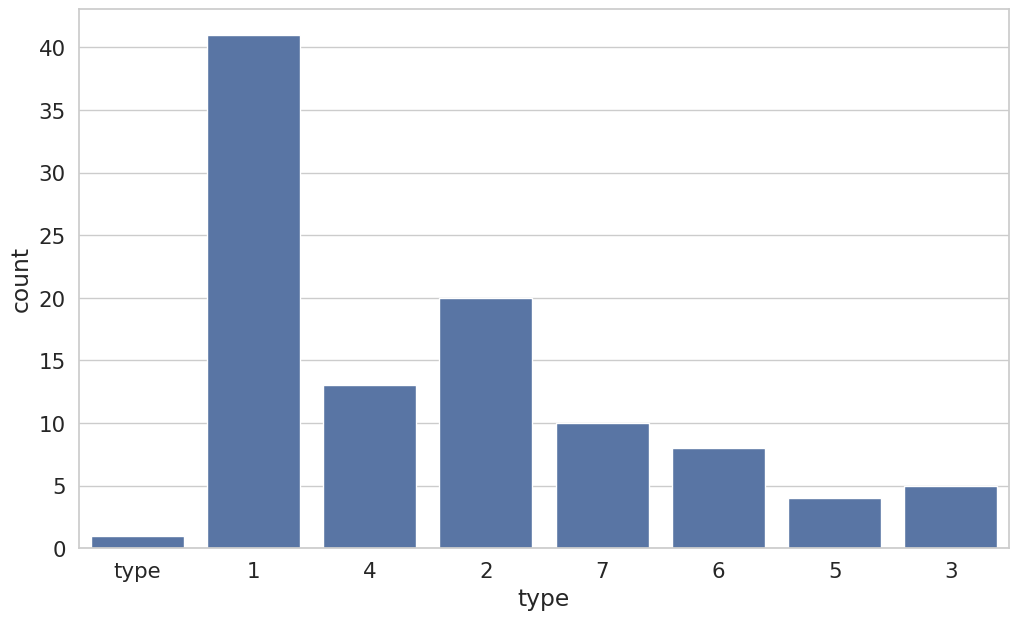

In [ ]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'type', data = df)

Training & Testing of data:

In [ ]:
array = df.values
X = array[:,1:17]
Y = array[:,17]

In [ ]:
X

array([['hair', 'feathers', 'eggs', ..., 'domestic', 'catsize', 'type'],
       ['1', '0', '0', ..., '0', '1', '1'],
       ['1', '0', '0', ..., '0', '1', '1'],
       ...,
       ['1', '0', '0', ..., '0', '1', '1'],
       ['0', '0', '1', ..., '0', '0', '7'],
       ['0', '1', '1', ..., '0', '0', '2']], dtype=object)

In [ ]:
Y = df['type']
Y

,type
0,type
1,1
2,1
3,4
4,1
...,...
97,1
98,6
99,1
100,7


In [ ]:
X = df.drop('animal name',axis=1)

In [ ]:
X = df.drop('type',axis=1)

In [ ]:
X.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8,legs_legs
0,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,False,False,False,False,False,False,True
1,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,False,False,True,False,False,False,False
2,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,False,False,True,False,False,False,False
3,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,True,False,False,False,False,False,False
4,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,False,False,True,False,False,False,False


In [ ]:
X_train = X[:80]
Y_train = Y[:80]

X_train = X[80:]
Y_train = Y[80:]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [ ]:
from collections import Counter
print(Counter(Y))


Counter({'1': 41, '2': 20, '4': 13, '7': 10, '6': 8, '3': 5, '5': 4, 'type': 1})


In [ ]:
X_train.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8,legs_legs
10,cavy,1,0,0,1,0,0,0,1,1,...,0,1,0,False,False,True,False,False,False,False
95,vole,1,0,0,1,0,0,0,1,1,...,1,0,0,False,False,True,False,False,False,False
4,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,False,False,True,False,False,False,False
54,octopus,0,0,1,0,0,1,1,0,0,...,0,0,1,False,False,False,False,False,True,False
66,pony,1,0,0,1,0,0,0,1,1,...,1,1,1,False,False,True,False,False,False,False


In [ ]:
X_test.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8,legs_legs
82,slug,0,0,1,0,0,0,0,0,0,...,0,0,0,True,False,False,False,False,False,False
68,puma,1,0,0,1,0,0,1,1,1,...,1,0,1,False,False,True,False,False,False,False
43,ladybird,0,0,1,0,1,0,1,0,0,...,0,0,0,False,False,False,False,True,False,False
74,seahorse,0,0,1,0,0,1,0,1,1,...,1,0,0,True,False,False,False,False,False,False
8,carp,0,0,1,0,0,1,0,1,1,...,1,1,0,True,False,False,False,False,False,False


In [ ]:
Y_train.head()

,type
10,1
95,1
4,1
54,7
66,1


In [ ]:
Y_test.head()

 Implementing the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

categorical_columns = ['animal name']  # List your categorical columns here
numeric_columns = ['legs_0', 'legs_2', 'legs_4','legs_5','legs_6','legs_8','legs_legs']  # List your numeric columns here

# Create a ColumnTransformer to handle both categorical and numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),
        ('num', 'passthrough', numeric_columns)
    ]
)

# preprocessing dataset
X = preprocessor.fit_transform(X)

# training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#the KNN model and GridSearchCV
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Define parameters for grid search
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)


print(grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)
error_score='raise'

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


using the k= 1 for KNN Classifier algorithm

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#k b/w 1 to 41
k_range = range(1, 41)
k_scores = []

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

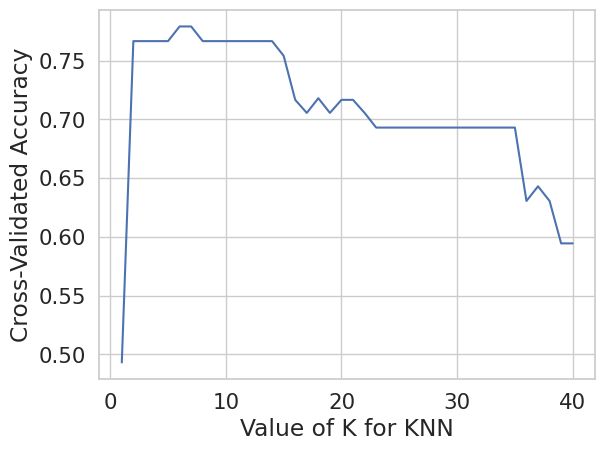

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Using KNN with k=1 for model classification

In [ ]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.38095238095238093


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[0 5 1 4 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 1 0 0 0]]


In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.38      1.00      0.55         3
           4       0.33      1.00      0.50         1
           5       0.29      1.00      0.44         2
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         2
        type       0.00      0.00      0.00         1

    accuracy                           0.38        21
   macro avg       0.24      0.57      0.33        21
weighted avg       0.16      0.38      0.22        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#1. What are the key hyperparameters in KNN?
Ans:-

->Number of Neighbors (k): The number of nearest neighbors to consider when making predictions.

->Distance Metric: The function used to measure the distance between data points.

-> Algorithm: The method used to compute the nearest neighbors.

->Metric Parameters: Additional parameters that may be required by certain distance metrics.

#2. What distance metrics can be used in KNN?
Ans:-

->Cosine Similarity:Measures the cosine of the angle between two vectors, indicating how similar they are irrespective of their magnitude.

->Hamming Distance:Measures the proportion of differing elements between two categorical data points.

->Euclidean Distance:The straight-line distance between two points in Euclidean space. It is the most commonly used distance metric.

-> Minkowski Distance: A generalization of both Euclidean and Manhattan distances, where p is a parameter.